In [2]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df2019 = pd.read_csv('transport_data.csv')
df2018 = pd.read_csv('2018.csv')
df2017 = pd.read_csv('2017.csv')
df2019['year'] = 2019
df2018['year'] = 2018
df2017['year'] = 2017
df = pd.concat([df2019, df2018,df2017])
df['log'] = (df['log']-df['log'].min())/(df['log'].max()-df['log'].min())
df['lat'] = (df['lat']-df['lat'].min())/(df['lat'].max()-df['lat'].min())
df['trans_ts'] = (df['trans_ts']-df['trans_ts'].min())/(df['trans_ts'].max()-df['trans_ts'].min())
df.shape

(296408, 6)

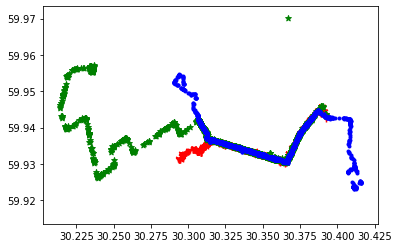

In [4]:
fig, ax = plt.subplots()

ax.scatter(df2019[df2019['label']=='0']['log'], df2019[df2019['label']=='0']['lat'], marker='1',color ='r')
ax.scatter(df2018[df2018['label']=='1']['log'], df2018[df2018['label']=='1']['lat'], marker='*',color ='g')
ax.scatter(df2017[df2017['label']=='2']['log'], df2017[df2017['label']=='2']['lat'], marker='.',color ='b')

plt.show()

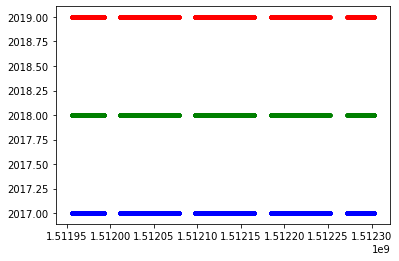

In [4]:
fig, ax = plt.subplots()

ax.scatter(df2019['trans_ts'], df2019['year'], marker='.',color ='r')
ax.scatter(df2018['trans_ts'], df2018['year'], marker='.',color ='g')
ax.scatter(df2017['trans_ts'], df2017['year'], marker='.',color ='b')


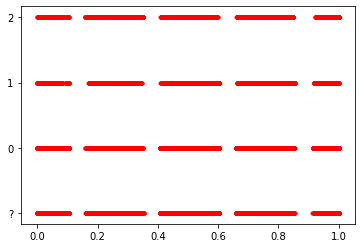

In [9]:
fig, ax = plt.subplots()

ax.scatter(df[df['label']=='?']['trans_ts'], df[df['label']=='?']['label'], marker='.',color ='r')
ax.scatter(df[df['label']=='0']['trans_ts'], df[df['label']=='0']['label'], marker='.',color ='r')
ax.scatter(df[df['label']=='1']['trans_ts'], df[df['label']=='1']['label'], marker='.',color ='r')
ax.scatter(df[df['label']=='2']['trans_ts'], df[df['label']=='2']['label'], marker='.',color ='r')


In [6]:
df = df.drop_duplicates(keep='first')
label_filter = ['0','1','2']

train = df.query('label == @label_filter')

In [7]:
y = train['label']
X = train.drop(['request_ts','label','year'], axis='columns')
X.shape

(60000, 3)

In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0) 
 
'''# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()'''
 
'''from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E6)'''

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=0) #500-94.8 200- 0.94866

model.fit(X_train, y_train) 
 
# making predictions on the testing set 
y_pred = model.predict(X_test) 
 
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("accuracy:", metrics.accuracy_score(y_test, y_pred))

accuracy: 0.9495


In [8]:
test = df[df['year']==2019]
test = test[test['label']=='?']
test = test.drop(['request_ts','label','year'],axis='columns')
test.shape

(5000, 3)

In [9]:
model1 = RandomForestClassifier(n_estimators=200, random_state=0)

model1.fit(X, y)

y_pred1 = model1.predict(test) 

In [10]:
np.savetxt('final.txt', y_pred1,delimiter='\n',fmt="%s" )